In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
from pylab import rcParams
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

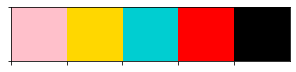

In [2]:
# Create an array with the colors you want to use
heat = [ 'pink', 'gold', 'darkturquoise', 'red', 'black']

# Set your custom color palette
my_pal = sns.color_palette(heat)

sns.palplot(my_pal)

# Acquire Data

In [3]:
train = pd.read_csv('train.csv')

In [4]:
#sample train observations 

train_ = train.sample(1000000) 

In [5]:
test = pd.read_csv('test.csv')

In [6]:
train_labels = pd.read_csv('train_labels.csv')

In [7]:
specs = pd.read_csv('specs.csv')

In [111]:
big = pd.merge(train, train_labels, how='left', on='game_session')

In [112]:
big.shape

(11341042, 17)

In [113]:
big.accuracy_group.value_counts(dropna=False)

NaN    10475595
3.0      303575
0.0      255079
1.0      197291
2.0      109502
Name: accuracy_group, dtype: int64

In [114]:
big = big[~big['accuracy_group'].isnull()]

In [115]:
big.shape

(865447, 17)

In [116]:
big.columns

Index(['event_id', 'game_session', 'timestamp', 'event_data',
       'installation_id_x', 'event_count', 'event_code', 'game_time',
       'title_x', 'type', 'world', 'installation_id_y', 'title_y',
       'num_correct', 'num_incorrect', 'accuracy', 'accuracy_group'],
      dtype='object')

In [117]:
big = big.drop(columns=['installation_id_y', 'title_y'])

In [118]:
big.columns

Index(['event_id', 'game_session', 'timestamp', 'event_data',
       'installation_id_x', 'event_count', 'event_code', 'game_time',
       'title_x', 'type', 'world', 'num_correct', 'num_incorrect', 'accuracy',
       'accuracy_group'],
      dtype='object')

In [124]:
big = big.rename(columns={'installation_id_x': 'installation_id', 'game_session': 'session'})

In [126]:
big.rename(columns={'title_x': 'title'}, inplace=True)

In [127]:
big.columns

Index(['event_id', 'session', 'timestamp', 'event_data', 'installation_id',
       'event_count', 'event_code', 'game_time', 'title', 'type', 'world',
       'num_correct', 'num_incorrect', 'accuracy', 'accuracy_group'],
      dtype='object')

In [128]:
big.to_csv('big.csv')

In [8]:
print(f'Size of train data is {train.shape}.')
print(f'Size of train_ data is {train_.shape}.')
print(f'Size of test data is {test.shape}.')
print(f'Size of train_labels data is {train_labels.shape}.')
print(f'Size of specs data is {specs.shape}.')

Size of train data is (11341042, 11).
Size of train_ data is (1000000, 11).
Size of test data is (1156414, 11).
Size of train_labels data is (17690, 7).
Size of specs data is (386, 3).


In [9]:
print(f'Size of train data is {train.shape}.')
print(f'Size of train_ data is {train_.shape}.')
print(f'Size of test data is {test.shape}.')
print(f'Size of train_labels data is {train_labels.shape}.')
print(f'Size of specs data is {specs.shape}.')

Size of train data is (11341042, 11).
Size of train_ data is (1000000, 11).
Size of test data is (1156414, 11).
Size of train_labels data is (17690, 7).
Size of specs data is (386, 3).


# Summarize train and train_ dfs

In [10]:
print(f'The train df has {train.shape[0]} rows and {train.shape[1]} columns.')
print(f'The train_ df has {train_.shape[0]} rows and {train_.shape[1]} columns.')

The train df has 11341042 rows and 11 columns.
The train_ df has 1000000 rows and 11 columns.


In [94]:
train_.title.value_counts().count()

44

In [26]:
specs.args[0]

'[{"name":"game_time","type":"int","info":"millisecond count since start of game"},{"name":"round","type":"int","info":"number of the current round when the event takes place or 0 if no round"},{"name":"level","type":"int","info":"number of the current level when the event takes place or 0 if no level"},{"name":"description","type":"string","info":"the text or description of the instruction"},{"name":"identifier","type":"string","info":"a unique identifier for this piece of instruction"},{"name":"media_type","type":"string","info":"the type of media that has just played:\\n\'audio\' || \'animation\' || \'other\'"},{"name":"duration","type":"int","info":"the duration of the media playback in milliseconds"},{"name":"event_count","type":"int","info":"session event counter"},{"name":"event_code","type":"int","info":"event class identifier"}]'

In [11]:
train_.head(1)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
3072009,2dc29e21,259913ec17cb7e84,2019-10-03T12:08:27.854Z,"{""dinosaur"":""sonny"",""house"":{""size"":2,""positio...",4408d92a,13,4020,14962,All Star Sorting,Game,TREETOPCITY


In [98]:
train_labels.accuracy_group.unique()

array([3, 0, 2, 1])

## Unique event_ids Associated with event_code '2000'

In [79]:
train_[train_.event_code == 2000].event_id.unique()

array(['7d093bf9', '27253bdc', '15ba1109', '9b01374f', '1cf54632',
       '9b23e8ee', '6d90d394', '3bfd1a65', '29bdd9ba', 'd2278a3b',
       '756e5507', '7ad3efc6', '4901243f', '8ac7cce4', 'b7dc8128',
       '5b49460a', 'f56e0afc', '51311d7a', '9c5ef70c', '48349b14',
       'c7f7f0e1', '77261ab5', 'd9c005dd', '90d848e0', 'e64e2cfd'],
      dtype=object)

## event_id Unique to 'Clip' Types

In [91]:
train_[train_.type == 'Clip'].event_id.unique()

array(['27253bdc'], dtype=object)

In [86]:
train_[train_.event_id == '27253bdc'].groupby(['installation_id', 'game_session','event_id','event_count', 'type','title', 'world']).mean()

event_code  \
installation_id game_session     event_id event_count type title                    world                      
0001e90f        091587ed87b9637c 27253bdc 1           Clip Magma Peak - Level 2     MAGMAPEAK           2000   
                17eeb7f223665f53 27253bdc 1           Clip Magma Peak - Level 1     MAGMAPEAK           2000   
                3fce4f09769ff0b7 27253bdc 1           Clip Tree Top City - Level 1  TREETOPCITY         2000   
0006a69f        6806a11d2985d2f8 27253bdc 1           Clip 12 Monkeys               TREETOPCITY         2000   
                73e3175bfa86fa3c 27253bdc 1           Clip Treasure Map             TREETOPCITY         2000   
                7fb287ace174adee 27253bdc 1           Clip Tree Top City - Level 2  TREETOPCITY         2000   
                e882eb6760063bb1 27253bdc 1           Clip Ordering Spheres         TREETOPCITY         2000   
0006c192        07f90f83b5fa0a01 27253bdc 1           Clip Tree Top City - Level 3  TREETOPCITY         2000   
                56da5323fcdb652c 27253bdc 1           Clip Rulers                   TREETOPCITY         2000   
0011edc8        db1d412f9f8c7ba4 27253bdc 1           Clip Tree Top City - Level 1  TREETOPCITY         2000   
0016b7cc        20058bb7a0a3e189 27253bdc 1           Clip Tree Top City - Level 2  TREETOPCITY         2000   
00195df7        dced074168a194eb 27253bdc 1           Clip Welcome to Lost Lagoon!  NONE                2000   
001d0ed0        2a7a72d005b36537 27253bdc 1           Clip Rulers                   TREETOPCITY         2000   
                3d311f718cff204d 27253bdc 1           Clip Honey Cake               CRYSTALCAVES        2000   
                80dc2daa4636a50f 27253bdc 1           Clip Balancing Act            CRYSTALCAVES        2000   
                8d9efce2e9618d80 27253bdc 1           Clip Crystal Caves - Level 1  CRYSTALCAVES        2000   
00225f67        fe34349639799cd6 27253bdc 1           Clip Welcome to Lost Lagoon!  NONE                2000   
00279ac5        425e866a7b1844ff 27253bdc 1           Clip Welcome to Lost Lagoon!  NONE                2000   
                bd94f1a371aa41bf 27253bdc 1           Clip Tree Top City - Level 3  TREETOPCITY         2000   
                dc4cc93f10d8fdbf 27253bdc 1           Clip Welcome to Lost Lagoon!  NONE                2000   
                e3c1fd048350d078 27253bdc 1           Clip Treasure Map             TREETOPCITY         2000   
002db7e3        0b4e953bc60028c2 27253bdc 1           Clip Pirate's Tale            TREETOPCITY         2000   
                d4afe68add4c01d5 27253bdc 1           Clip Tree Top City - Level 2  TREETOPCITY         2000   
003372b0        13ecc8900d28f8d6 27253bdc 1           Clip Lifting Heavy Things     CRYSTALCAVES        2000   
                4eaee25d948f7d8b 27253bdc 1           Clip Honey Cake               CRYSTALCAVES        2000   
                745441510b9db8df 27253bdc 1           Clip Welcome to Lost Lagoon!  NONE                2000   
                89fc60686d72ddc2 27253bdc 1           Clip Ordering Spheres         TREETOPCITY         2000   
0038b87c        dc747ba1336fa698 27253bdc 1           Clip Welcome to Lost Lagoon!  NONE                2000   
004c2091        a56caa8da96e7384 27253bdc 1           Clip Lifting Heavy Things     CRYSTALCAVES        2000   
                bb786965eba70563 27253bdc 1           Clip Heavy, Heavier, Heaviest CRYSTALCAVES        2000   
...                                                                                                      ...   
ff90db99        d2673ea2f7d0dc28 27253bdc 1           Clip Ordering Spheres         TREETOPCITY         2000   
                fa815cc05983b7bf 27253bdc 1           Clip Welcome to Lost Lagoon!  NONE                2000   
ff92b29d        f8bc28b78f7510b2 27253bdc 1           Clip Magma Peak - Level 1     MAGMAPEAK           2000   
ff9305d7        b484e802ee51a197 27253bdc 1           Clip Crystal

In [55]:
train_.groupby(['installation_id', 'game_session','event_id','event_count', 'type','title']).mean()


event_code  \
installation_id game_session     event_id event_count type     title                         world        timestamp                              
0001e90f        07bacda7f9437b38 1996c610 62          Game     Dino Drink                    MAGMAPEAK    2019-09-06T18:13:31.864Z        4031   
                                          84          Game     Dino Drink                    MAGMAPEAK    2019-09-06T18:13:53.681Z        4031   
                                 4d911100 137         Game     Dino Drink                    MAGMAPEAK    2019-09-06T18:15:26.319Z        3121   
                                 51311d7a 1           Game     Dino Drink                    MAGMAPEAK    2019-09-06T18:11:28.381Z        2000   
                                 6c517a88 7           Game     Dino Drink                    MAGMAPEAK    2019-09-06T18:11:45.065Z        4070   
                                          74          Game     Dino Drink                    MAGMAPEAK    2019-09-06T18:13:45.641Z        4070   
                                          93          Game     Dino Drink                    MAGMAPEAK    2019-09-06T18:14:06.332Z        4070   
                                          105         Game     Dino Drink                    MAGMAPEAK    2019-09-06T18:14:30.911Z        4070   
                                 74e5f8a7 39          Game     Dino Drink                    MAGMAPEAK    2019-09-06T18:12:56.042Z        4020   
                                 77ead60d 59          Game     Dino Drink                    MAGMAPEAK    2019-09-06T18:13:23.831Z        3021   
                                 792530f8 47          Game     Dino Drink                    MAGMAPEAK    2019-09-06T18:13:05.263Z        4030   
                                          70          Game     Dino Drink                    MAGMAPEAK    2019-09-06T18:13:40.776Z        4030   
                                          99          Game     Dino Drink                    MAGMAPEAK    2019-09-06T18:14:18.782Z        4030   
                                 7f0836bf 20          Game     Dino Drink                    MAGMAPEAK    2019-09-06T18:11:58.809Z        3110   
                                          26          Game     Dino Drink                    MAGMAPEAK    2019-09-06T18:12:22.927Z        3110   
                                          55          Game     Dino Drink                    MAGMAPEAK    2019-09-06T18:13:17.463Z        3110   
                                 f806dc10 54          Game     Dino Drink                    MAGMAPEAK    2019-09-06T18:13:13.717Z        2020   
                0848ef14a8dc6892 1325467d 5           Activity Sandcastle Builder (Activity) MAGMAPEAK    2019-09-06T17:55:06.913Z        4070   
                                          8           Activity Sandcastle Builder (Activity) MAGMAPEAK    2019-09-06T17:55:08.566Z        4070   
                                          10          Activity Sandcastle Builder (Activity) MAGMAPEAK    2019-09-06T17:55:09.673Z        4070   
                                          28          Activity Sandcastle Builder (Activity) MAGMAPEAK    2019-09-06T17:55:14.864Z        4070   
                                          41          Activity Sandcastle Builder (Activity) MAGMAPEAK    2019-09-06T17:55:21.477Z        4070   
                                          90          Activity Sandcastle Builder (Activity) MAGMAPEAK    2019-09-06T17:55:41.842Z        4070   
                                          121         Activity Sandcastle Builder (Activity) MAGMAPEAK    2019-09-06T17:55:50.338Z        4070   
                                          162         Activity Sandcastle Builder (Activity) MAGMAPEAK    2019-09-06T17:56:19.500Z        4070   
                                          173         Activity Sandcastle Builder (Activity) MAGMAPEAK    2019-09-06T17:56:36.983Z        4070   
                                          24

<font color=green>**Here we can see the 20 count of titles binned in the clip event_id.**</font>

In [130]:
train_.groupby('event_id')['title'].nunique().sort_values(ascending=True).tail()


event_id
5154fc30     1
51311d7a     1
56817e2b     1
fd20ea40     1
27253bdc    20
Name: title, dtype: int64

<font color=green>**Peek into event_data.**</font>

In [12]:
train['event_data'][5]

'{"coordinates":{"x":583,"y":605,"stage_width":1015,"stage_height":762},"event_count":4,"game_time":9991,"event_code":4070}'

<font color=green>**384 count of event_ids**.</font>

In [14]:
train.event_id.value_counts().count()

384

<font color=green>**17000 count of unique installation_ids**.</font>

In [15]:
train.installation_id.value_counts().count()

17000

<font color=green>**game_sessions group events within a single game or video play session.** 
    
**event_codes represent actions taken within a game or video play session.**.</font>

In [131]:
train.groupby(['installation_id', 'game_session', 'event_code']).mean()

event_count      game_time
installation_id game_session     event_code                            
0001e90f        04168b61c0650977 2000           1.000000       0.000000
                07bacda7f9437b38 2000           1.000000       0.000000
                                 2020          77.750000  139249.250000
                                 2030          92.666667  165658.000000
                                 2060           3.000000   12552.000000
                                 2070          23.000000   48272.000000
                                 3010          45.750000   80930.250000
                                 3020          52.500000  100167.500000
                                 3021          94.818182  170320.000000
                                 3110          36.000000   63713.142857
                                 3120          55.500000  103459.000000
                                 3121          97.454545  174197.454545
                                 4010           2.000000   10502.000000
                                 4020          83.083333  151581.916667
                                 4030          79.000000  141749.928571
                                 4031          78.461538  141307.846154
                                 4070          67.901961  121348.470588
                0848ef14a8dc6892 2000           1.000000       0.000000
                                 3010         166.818182  104212.000000
                                 3110         169.000000  106150.272727
                                 4020         213.428571  135221.571429
                                 4021         205.800000  127657.533333
                                 4030         152.867647   88193.632353
                                 4035         126.733333   68320.022222
                                 4070          89.116279   52846.790698
                                 4090          46.000000   29685.000000
                091587ed87b9637c 2000           1.000000       0.000000
                17eeb7f223665f53 2000           1.000000       0.000000
                3fce4f09769ff0b7 2000           1.000000       0.000000
                45bb1e1b6b50c07b 2000           1.000000       0.000000
...                                                  ...            ...
fffc0583        b4d864e5a2e0ce13 3010          16.200000   15060.800000
                                 3110          17.400000   17409.000000
                                 4020          20.285714   18792.285714
                                 4030          19.000000   17919.714286
                                 4070          24.000000   23054.428571
                b5812175588a247c 2000           1.000000       0.000000
                                 2020           5.000000    5903.000000
                                 3010          28.000000   28436.500000
                                 3020          28.666667   30250.333333
                                 3110           4.000000    5903.000000
                                 3120          32.666667   34226.333333
                                 4010           2.000000    2536.000000
                                 4020          19.000000   22687.000000
                                 4030          28.909091   30543.363636
                                 4035          34.625000   35103.875000
                                 4070          24.250000   23963.333333
                                 4090          52.000000   52138.000000
                c09b94eebfdf50a6 2000           1.000000       0.000000
                                 2060           7.000000   11026.000000
                                 3010          27.166667   34049.333333
                                 3021          17.000000   18643.000000
                                 3110          29.166667   36466.333333
                                 3121          23.000000   23393.000000
             

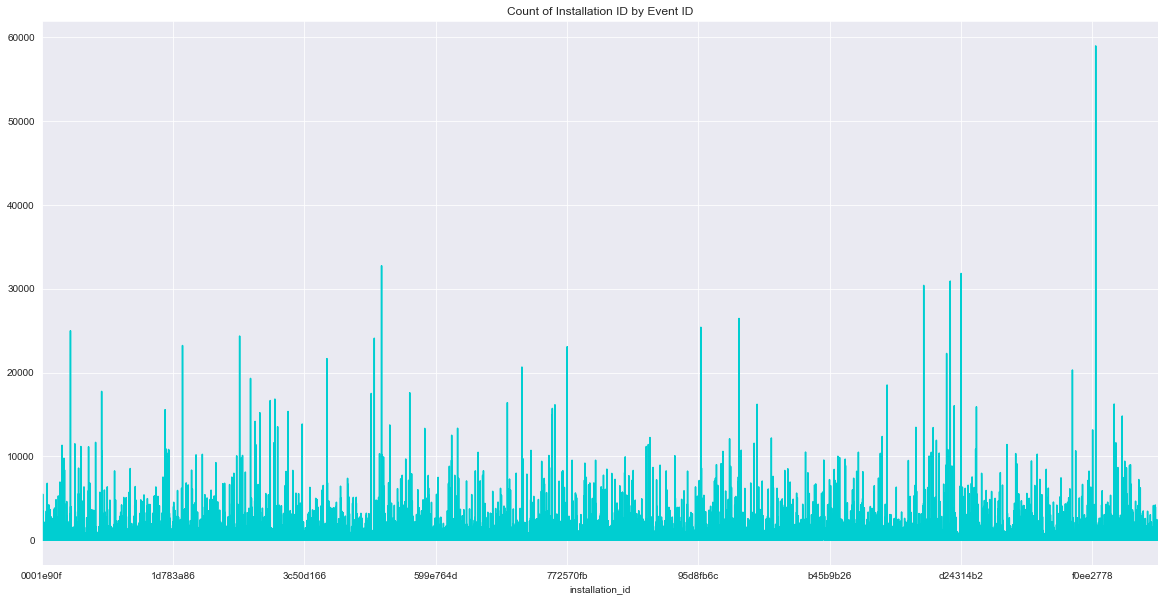

In [16]:
sns.set_style(style='darkgrid')
plt.figure(figsize = (20, 10))
train.groupby('installation_id')['event_id'].count().plot(c=my_pal[2])

plt.title('Count of Installation ID by Event ID')
plt.show()

In [18]:
train_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 3072009 to 6775899
Data columns (total 11 columns):
event_id           1000000 non-null object
game_session       1000000 non-null object
timestamp          1000000 non-null object
event_data         1000000 non-null object
installation_id    1000000 non-null object
event_count        1000000 non-null int64
event_code         1000000 non-null int64
game_time          1000000 non-null int64
title              1000000 non-null object
type               1000000 non-null object
world              1000000 non-null object
dtypes: int64(3), object(8)
memory usage: 91.6+ MB


In [17]:
print(f"The train df has {train['installation_id'].nunique()} unique installation_id values and no nulls.")
print(f"The train_ df has {train_['installation_id'].nunique()} unique installation_id values and no nulls.")

The train df has 17000 unique installation_id values and no nulls.
The train_ df has 13291 unique installation_id values and no nulls.


In [18]:
train_.isnull().sum()

event_id           0
game_session       0
timestamp          0
event_data         0
installation_id    0
event_count        0
event_code         0
game_time          0
title              0
type               0
world              0
dtype: int64

In [19]:
train_.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

event_id              374
game_session       124299
timestamp          995165
event_data         967738
installation_id     13291
title                  44
type                    4
world                   4
dtype: int64

# Summarize train_labels df

In [20]:
print(f'The train_labels df has {train_labels.shape[0]} rows and {train_labels.shape[1]} columns.')

The train_labels df has 17690 rows and 7 columns.


In [21]:
print(f"The train_label df has {train_labels['installation_id'].nunique()} unique installation_id values and no nulls.")

The train_label df has 3614 unique installation_id values and no nulls.


In [22]:
train_labels.isnull().sum()

game_session       0
installation_id    0
title              0
num_correct        0
num_incorrect      0
accuracy           0
accuracy_group     0
dtype: int64

In [134]:
train_labels.head(2)

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.0,0


In [26]:
train_labels.select_dtypes('object').apply(pd.Series.nunique, axis = 0)


game_session       17690
installation_id     3614
title                  5
dtype: int64

## 50% of users pass the assessments on the first try

In [27]:
train_labels.groupby('accuracy_group')['installation_id'].count()

accuracy_group
0    4229
1    2411
2    2205
3    8845
Name: installation_id, dtype: int64

In [28]:
values = pd.DataFrame()

In [29]:
values['percent'] = train_labels.accuracy_group.value_counts(normalize=True)

In [30]:
values['count'] = train_labels.accuracy_group.value_counts()
values

,percent,count
3,0.500000,8845
0,0.239062,4229
1,0.136292,2411
2,0.124647,2205


# Summarize spec data

In [31]:
print(f'The specs df has {specs.shape[0]} rows and {specs.shape[1]} columns.')

The specs df has 386 rows and 3 columns.


In [32]:
specs.head()

,event_id,info,args
0,2b9272f4,The end of system-initiated feedback (Correct)...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
1,df4fe8b6,The end of system-initiated feedback (Incorrec...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
2,3babcb9b,The end of system-initiated instruction event ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
3,7f0836bf,The end of system-initiated instruction event ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
4,ab3136ba,The end of system-initiated instruction event ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."


In [33]:
specs.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

event_id    386
info        168
args        191
dtype: int64

# Explore train_ df

In [132]:
# train sample df representative of train df

train_.describe(), train.describe()

(          event_count      event_code     game_time
 count  1000000.000000  1000000.000000  1.000000e+06
 mean       105.436747     3513.852980  1.980681e+05
 std        147.643788      681.717893  1.860275e+06
 min          1.000000     2000.000000  0.000000e+00
 25%         25.000000     3021.000000  3.057200e+04
 50%         60.000000     4020.000000  7.254400e+04
 75%        128.000000     4035.000000  1.574625e+05
 max       3352.000000     5010.000000  3.069097e+08,
         event_count    event_code     game_time
 count  1.134104e+07  1.134104e+07  1.134104e+07
 mean   1.056642e+02  3.513838e+03  1.976236e+05
 std    1.483477e+02  6.816470e+02  1.803968e+06
 min    1.000000e+00  2.000000e+03  0.000000e+00
 25%    2.500000e+01  3.021000e+03  3.061800e+04
 50%    6.100000e+01  4.020000e+03  7.276100e+04
 75%    1.290000e+02  4.035000e+03  1.574460e+05
 max    3.368000e+03  5.010000e+03  3.069102e+08)

In [34]:
corrs = train_.corr()
corrs

,event_count,event_code,game_time
event_count,1.000000,0.043400,0.137767
event_code,0.043400,1.000000,0.005341
game_time,0.137767,0.005341,1.000000


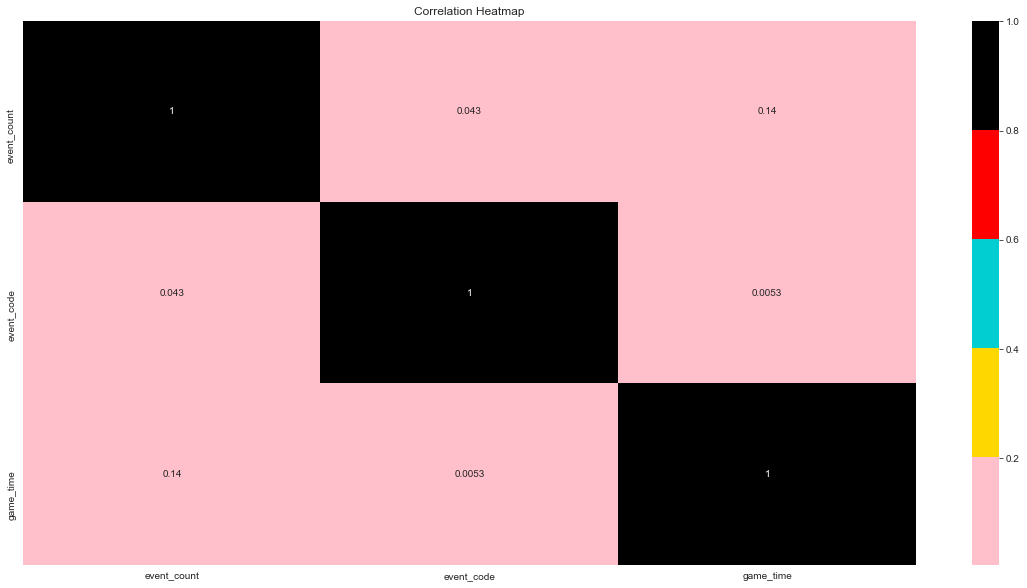

In [35]:
plt.figure(figsize = (20, 10))

sns.heatmap(corrs, cmap = my_pal, annot = True)
plt.title('Correlation Heatmap');

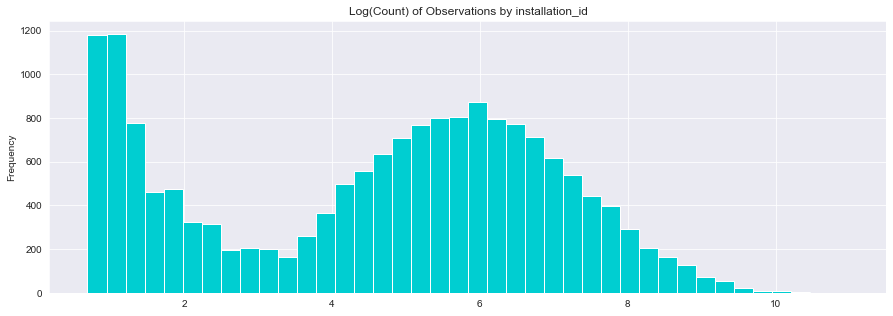

In [36]:
train.groupby('installation_id') \
    .count()['event_id'] \
    .apply(np.log1p) \
    .plot(kind='hist',
          bins=40,
          color=my_pal[2],
         figsize=(15, 5),
         title='Log(Count) of Observations by installation_id')
plt.show()

In [37]:
train_.head(1)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
2200714,69fdac0a,47fe9a06a5b6fe3a,2019-09-25T13:53:03.256Z,"{""description"":""When one side tips down… that ...",31142574,74,3110,99080,Happy Camel,Game,CRYSTALCAVES


In [38]:
train_labels.head(1)

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3


In [39]:
merge.head(1)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title_x,type,world,title_y,num_correct,num_incorrect,accuracy,accuracy_group
0,3bfd1a65,901acc108f55a5a1,2019-08-06T05:22:01.344Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,Mushroom Sorter (Assessment),1,0,1.0,3


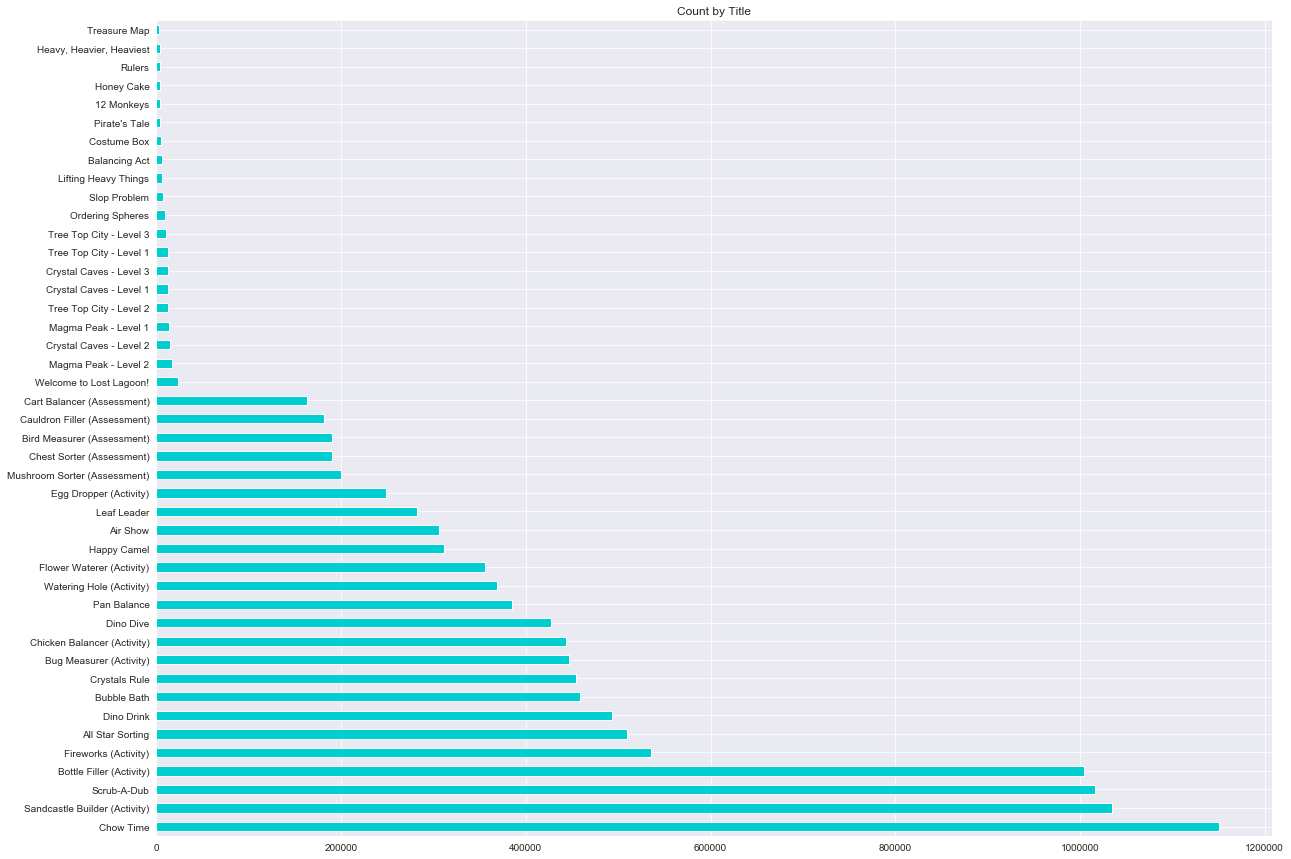

In [40]:
train['title'].value_counts().plot(kind='barh', figsize=(20, 15), title='Count by Title', color=my_pal[2])

plt.show()

In [41]:
train.world.value_counts()

MAGMAPEAK       5023687
CRYSTALCAVES    3232546
TREETOPCITY     3061231
NONE              23578
Name: world, dtype: int64

- Convert timestamp to datetime object and extract hour time parts for exploration

In [98]:
# Format and make date / hour features
train['timestamp'] = pd.to_datetime(train['timestamp'])
train['date'] = train['timestamp'].dt.date
train['hour'] = train['timestamp'].dt.hour
train['weekday_name'] = train['timestamp'].dt.weekday_name
# Same for test
test['timestamp'] = pd.to_datetime(test['timestamp'])
test['date'] = test['timestamp'].dt.date
test['hour'] = test['timestamp'].dt.hour
test['weekday_name'] = test['timestamp'].dt.weekday_name

In [43]:
train.head(1)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title_x,type,world,title_y,num_correct,num_incorrect,accuracy,accuracy_group,date,hour,weekday_name
0,3bfd1a65,901acc108f55a5a1,2019-08-06 05:22:01.344000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,Mushroom Sorter (Assessment),1,0,1.0,3,2019-08-06,5,Tuesday


In [44]:
train.weekday_name.value_counts()

Saturday     133969
Thursday     127503
Friday       127255
Sunday       125414
Monday       120935
Tuesday      115423
Wednesday    114948
Name: weekday_name, dtype: int64

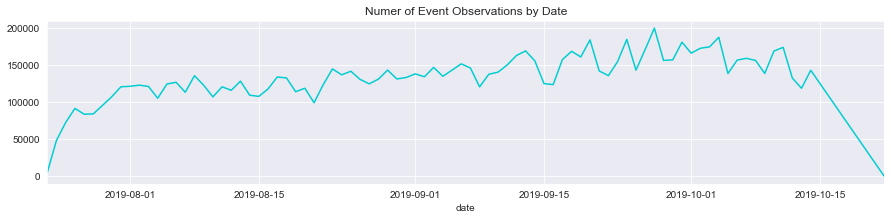

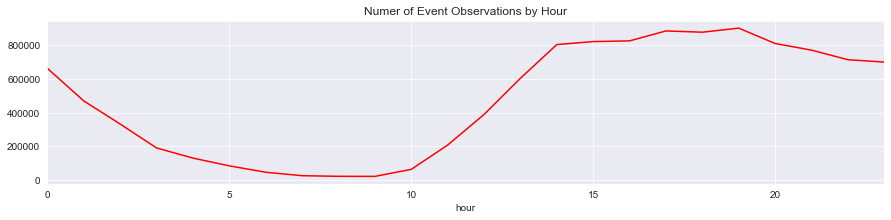

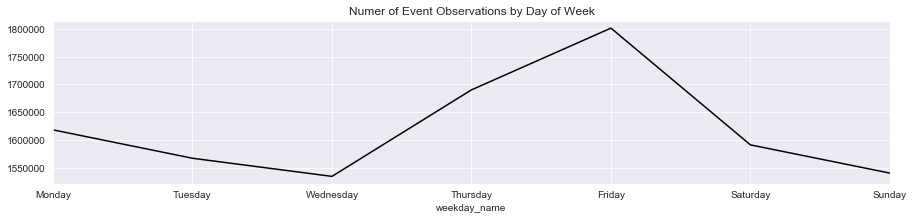

In [99]:
train.groupby('date')['event_id'] \
    .agg('count') \
    .plot(figsize=(15, 3),
         title='Numer of Event Observations by Date',
         color=my_pal[2])
plt.show()
train.groupby('hour')['event_id'] \
    .agg('count') \
    .plot(figsize=(15, 3),
         title='Numer of Event Observations by Hour',
         color=my_pal[3])
plt.show()
train.groupby('weekday_name')['event_id'] \
    .agg('count').T[['Monday','Tuesday','Wednesday',
                     'Thursday','Friday','Saturday',
                     'Sunday']].T.plot(figsize=(15, 3),
                                       title='Numer of Event Observations by Day of Week',
                                       color=my_pal[4])
plt.show()

# Explore train_labels df

In [19]:
train_labels.head()

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.0,0
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
3,9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),1,1,0.5,2
4,a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),1,0,1.0,3


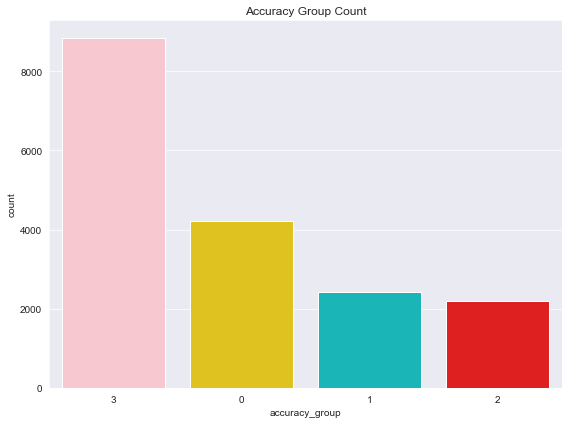

In [75]:
plt.figure(figsize=(8, 6))

sns.countplot(x="accuracy_group",data=train_labels, order = train_labels['accuracy_group'].value_counts().index, palette=my_pal)

plt.title('Accuracy Group Count')
plt.tight_layout()
plt.show()

In [76]:
corrs = merge.corr()
corrs

,event_count,event_code,game_time,num_correct,num_incorrect,accuracy,accuracy_group
event_count,1.000000,0.043830,0.142553,-0.126638,0.472223,-0.277291,-0.256580
event_code,0.043830,1.000000,0.005257,-0.142874,0.108351,-0.200408,-0.197680
game_time,0.142553,0.005257,1.000000,-0.002159,0.043026,-0.032363,-0.026637
num_correct,-0.126638,-0.142874,-0.002159,1.000000,-0.341030,0.708417,0.798787
num_incorrect,0.472223,0.108351,0.043026,-0.341030,1.000000,-0.482449,-0.460427
accuracy,-0.277291,-0.200408,-0.032363,0.708417,-0.482449,1.000000,0.982790
accuracy_group,-0.256580,-0.197680,-0.026637,0.798787,-0.460427,0.982790,1.000000


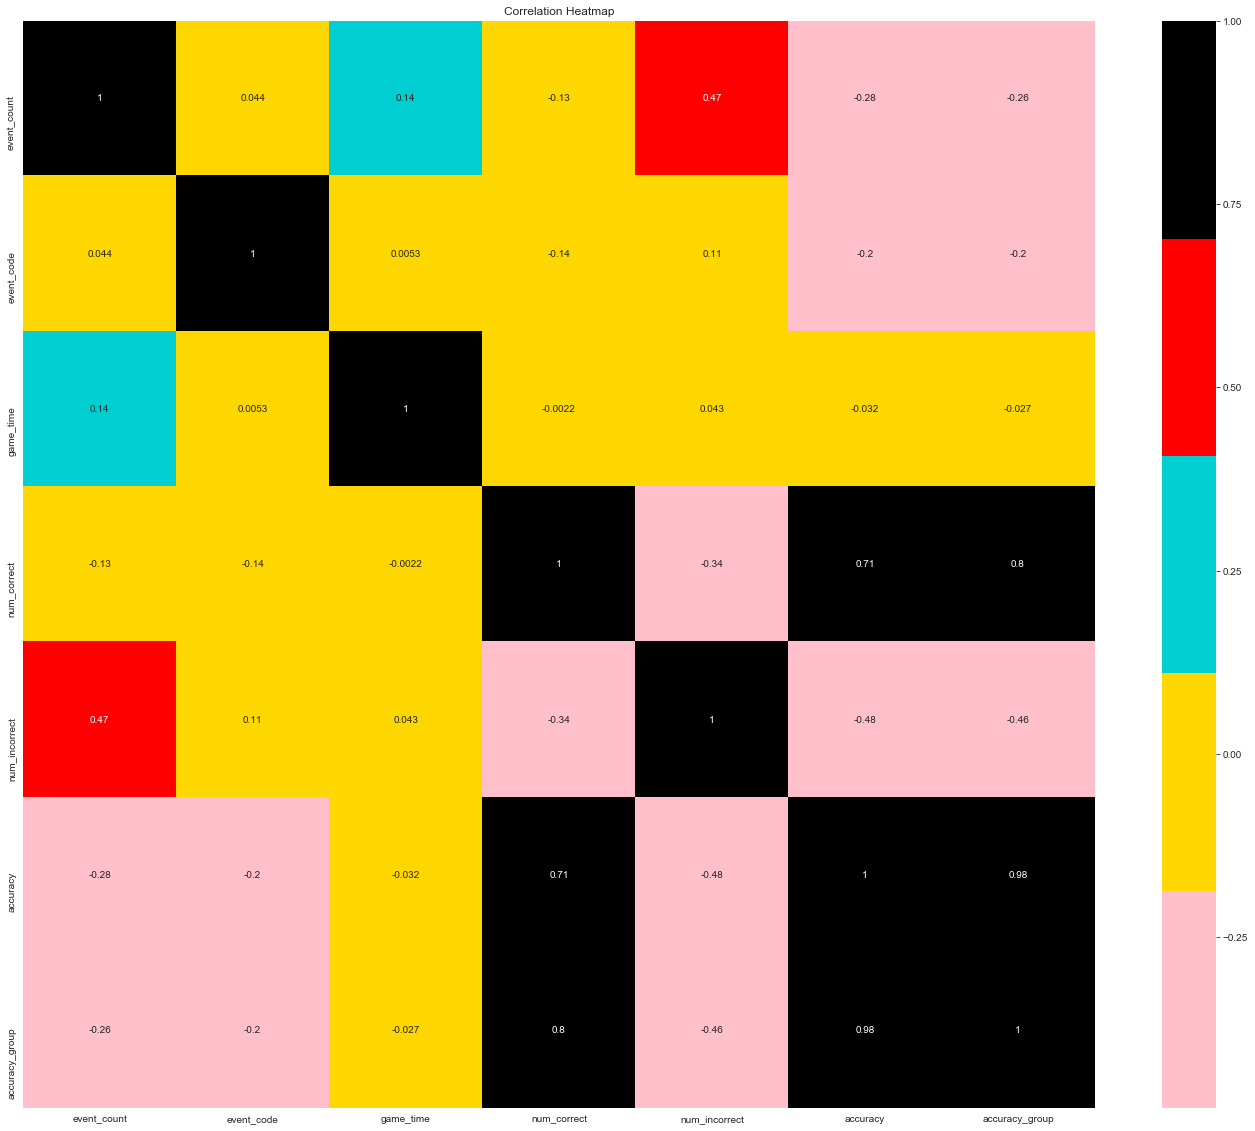

In [77]:
plt.figure(figsize = (24, 20))

sns.heatmap(corrs, cmap = my_pal, annot = True)
plt.title('Correlation Heatmap');

In [49]:
train_labels[train_labels['accuracy_group'] == 3]['title'].value_counts()

Cart Balancer (Assessment)      2752
Cauldron Filler (Assessment)    2545
Mushroom Sorter (Assessment)    2348
Bird Measurer (Assessment)       693
Chest Sorter (Assessment)        507
Name: title, dtype: int64

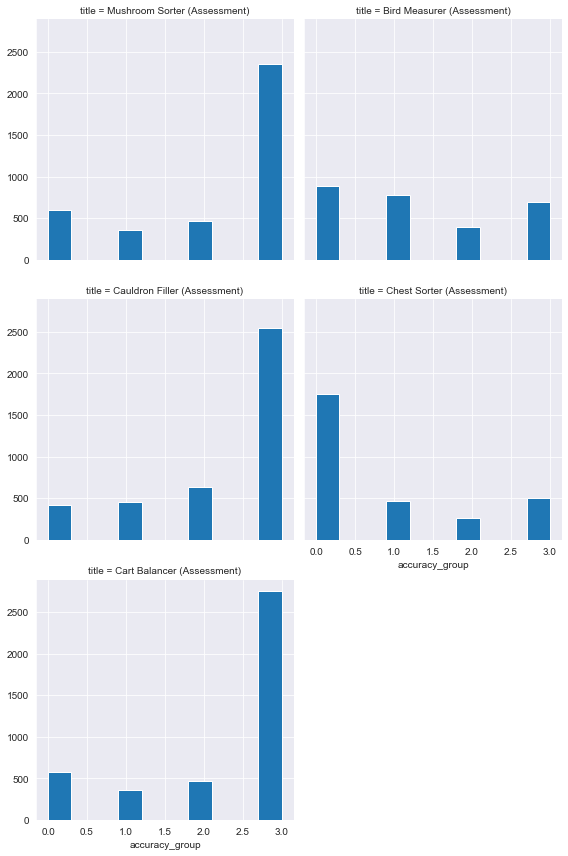

In [50]:
g = sns.FacetGrid(data=train_labels, col="title", col_wrap=2,height=4)

g = (g.map(plt.hist, "accuracy_group"))

plt.show()

In [51]:
train_labels[train_labels['accuracy_group'] == 2]['title'].value_counts()

Cauldron Filler (Assessment)    630
Cart Balancer (Assessment)      470
Mushroom Sorter (Assessment)    460
Bird Measurer (Assessment)      389
Chest Sorter (Assessment)       256
Name: title, dtype: int64

In [52]:
train_labels[train_labels['accuracy_group'] == 1]['title'].value_counts()

Bird Measurer (Assessment)      778
Chest Sorter (Assessment)       466
Cauldron Filler (Assessment)    459
Mushroom Sorter (Assessment)    355
Cart Balancer (Assessment)      353
Name: title, dtype: int64

In [53]:
train_labels[train_labels['accuracy_group'] == 0]['title'].value_counts()

Chest Sorter (Assessment)       1752
Bird Measurer (Assessment)       886
Mushroom Sorter (Assessment)     594
Cart Balancer (Assessment)       576
Cauldron Filler (Assessment)     421
Name: title, dtype: int64

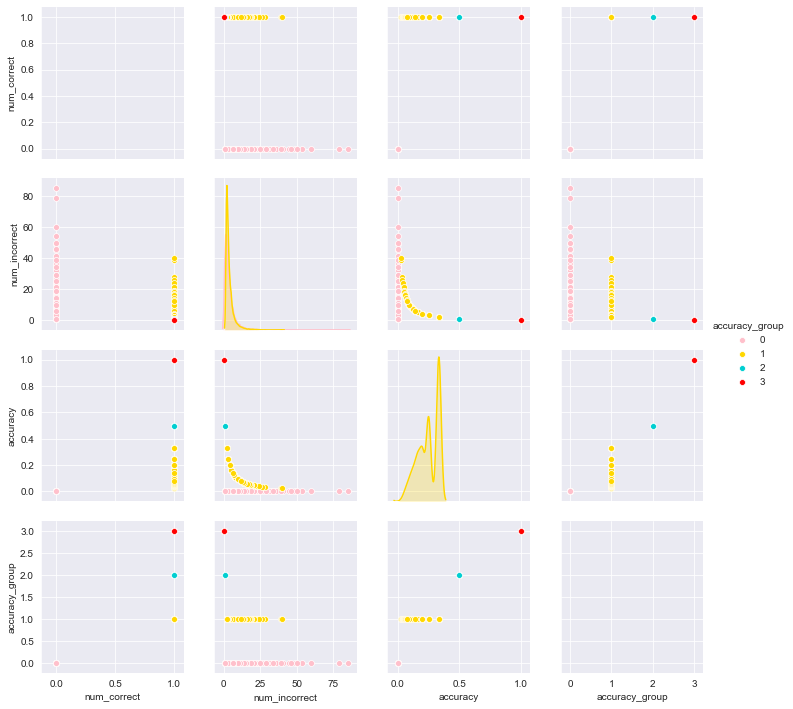

In [54]:
sns.pairplot(train_labels, hue='accuracy_group', palette=my_pal)
plt.show()

In [79]:
train.head(1)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,45bb1e1b6b50c07b,2019-09-06T17:53:46.937Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE


In [80]:
train['type'].value_counts()

Game          5795293
Activity      4436728
Assessment     925345
Clip           183676
Name: type, dtype: int64

In [82]:
train['event_id'].nunique()

384

# Explore specs df

In [83]:
specs.head(1)

,event_id,info,args
0,2b9272f4,The end of system-initiated feedback (Correct)...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."


In [92]:
specs.args[0]

'[{"name":"game_time","type":"int","info":"millisecond count since start of game"},{"name":"round","type":"int","info":"number of the current round when the event takes place or 0 if no round"},{"name":"level","type":"int","info":"number of the current level when the event takes place or 0 if no level"},{"name":"description","type":"string","info":"the text or description of the instruction"},{"name":"identifier","type":"string","info":"a unique identifier for this piece of instruction"},{"name":"media_type","type":"string","info":"the type of media that has just played:\\n\'audio\' || \'animation\' || \'other\'"},{"name":"duration","type":"int","info":"the duration of the media playback in milliseconds"},{"name":"event_count","type":"int","info":"session event counter"},{"name":"event_code","type":"int","info":"event class identifier"}]'

In [97]:
specs['info'].value_counts()

This event occurs when the player clicks on the help button. It contains information about the state of the game that caused the player to seek help. This event is usually followed by a 3010 (system-initiated instruction) event. It helps identify points that players feel are too difficult.                                                                                                                                                                                                                                     17
The start game event is triggered at the very beginning of the level (after the game finishes loading, don't wait for intro movie to finish). This is used to compute things like time spent in game.                                                                                                                                                                                                                                                                                         